In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import io
# import io
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
from tabulate import tabulate
from PIL import Image
from scipy.fft import fft2, fftshift, ifft2, ifftshift

In [6]:
im1 = cv2.imread("1.png", cv2.IMREAD_GRAYSCALE)
im2 = cv2.imread("2.png", cv2.IMREAD_GRAYSCALE)
im3 = cv2.imread("3.png", cv2.IMREAD_GRAYSCALE)
im4 = cv2.imread("4.png", cv2.IMREAD_GRAYSCALE)

In [18]:
def ideal_lpf(shape, cutoff):
    rows, cols = shape
    center_u, center_v = rows // 2, cols // 2
    u, v = np.meshgrid(np.arange(rows), np.arange(cols))
    distance = np.sqrt((u - center_u)**2 + (v - center_v)**2)
    lpf = np.zeros((rows, cols))
    lpf[distance <= cutoff] = 1
    return lpf

def apply_ideal_lpf(image, cutoff):
    fft = fft2(image)
    fft_shifted = fftshift(fft)
    lpf = ideal_lpf(image.shape, cutoff)
    filtered_fft = fft_shifted * lpf
    filtered_shifted = ifftshift(filtered_fft)
    filtered = ifft2(filtered_shifted)
    filtered_image = np.abs(filtered)
    return filtered_image




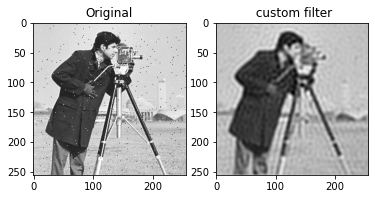

In [53]:
# image 1
image = im1
cutoff =30
filtered_image = apply_ideal_lpf(image, cutoff)
fig, axs = plt.subplots(1, 2)
axs[0].imshow(im1, cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(filtered_image, cmap='gray')
axs[1].set_title(' custom filter')
plt.show()

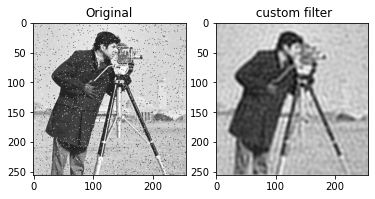

In [54]:
#image 2
image = im2
cutoff = 30
filtered_image = apply_ideal_lpf(image, cutoff)
fig, axs = plt.subplots(1, 2)
axs[0].imshow(im2, cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(filtered_image, cmap='gray')
axs[1].set_title(' custom filter')
plt.show()

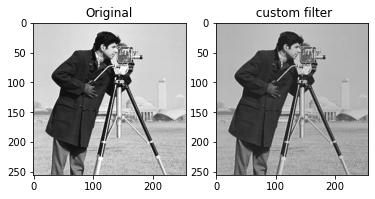

In [51]:
# image 3
image = im3
cutoff = 100
filtered_image = apply_ideal_lpf(image, cutoff)

fig, axs = plt.subplots(1, 2)
axs[0].imshow(im3, cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(filtered_image, cmap='gray')
axs[1].set_title(' custom filter')
plt.show()

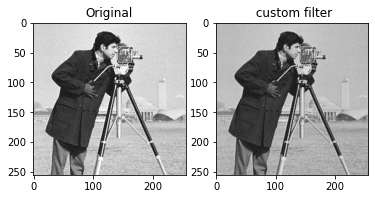

In [52]:
# image 4
image = im4
cutoff = 95
filtered_image = apply_ideal_lpf(image, cutoff)
fig, axs = plt.subplots(1, 2)
axs[0].imshow(im4, cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(filtered_image, cmap='gray')
axs[1].set_title(' custom filter')
plt.show()

In [55]:
def gaussian_lpf(shape, std, radius):
    rows, cols = shape
    center_u, center_v = rows // 2, cols // 2
    u, v = np.meshgrid(np.arange(rows), np.arange(cols), indexing='ij')
    distance = np.sqrt((u - center_u)**2 + (v - center_v)**2)
    lpf = np.exp(-distance**2 / (2 * radius**2))
    return lpf

def apply_gaussian_lpf(image, std, radius):
    fft = fft2(image)
    fft_shifted = fftshift(fft)
    lpf = gaussian_lpf(image.shape, std, radius)
    filtered_fft = fft_shifted * lpf
    filtered_shifted = ifftshift(filtered_fft)
    filtered = ifft2(filtered_shifted)
    filtered_image = np.abs(filtered)
    return filtered_image


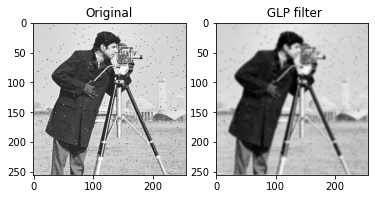

In [61]:
image = im1

filtered_image = apply_gaussian_lpf(image, 30,30)
fig, axs = plt.subplots(1, 2)
axs[0].imshow(im1, cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(filtered_image, cmap='gray')
axs[1].set_title(' GLP filter')
plt.show()


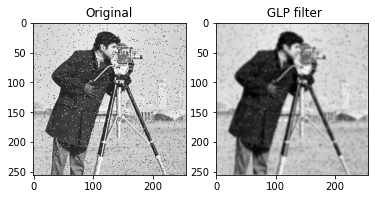

In [62]:
image = im2
filtered_image = apply_gaussian_lpf(image, 30,30)
fig, axs = plt.subplots(1, 2)
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(filtered_image, cmap='gray')
axs[1].set_title(' GLP filter')
plt.show()

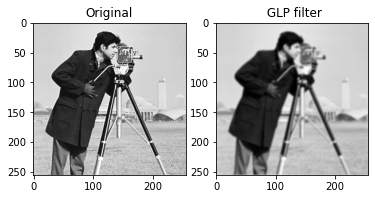

In [63]:
image = im3
filtered_image = apply_gaussian_lpf(image, 30,30)
fig, axs = plt.subplots(1, 2)
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(filtered_image, cmap='gray')
axs[1].set_title(' GLP filter')
plt.show()

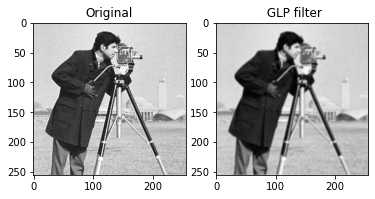

In [70]:
image = im4
filtered_image = apply_gaussian_lpf(image, 30,40)
fig, axs = plt.subplots(1, 2)
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(filtered_image, cmap='gray')
axs[1].set_title(' GLP filter')
plt.show()

In [72]:
def ideal_hpf(shape, radius):
    rows, cols = shape
    center_u, center_v = rows // 2, cols // 2
    u, v = np.meshgrid(np.arange(rows), np.arange(cols), indexing='ij')
    distance = np.sqrt((u - center_u)**2 + (v - center_v)**2)
    hpf = np.zeros((rows, cols))
    hpf[distance > radius] = 1
    return hpf

def apply_ideal_hpf(image, radius):
    fft = fft2(image)
    fft_shifted = fftshift(fft)
    hpf = ideal_hpf(image.shape, radius)
    filtered_fft = fft_shifted * hpf
    filtered_shifted = ifftshift(filtered_fft)
    filtered = ifft2(filtered_shifted)
    filtered_image = np.abs(filtered)
    return filtered_image


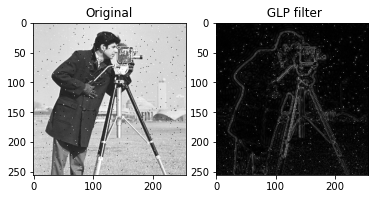

In [76]:
image = im1
filtered_image = apply_ideal_hpf(image, 30)
fig, axs = plt.subplots(1, 2)
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(filtered_image, cmap='gray')
axs[1].set_title(' GLP filter')
plt.show()

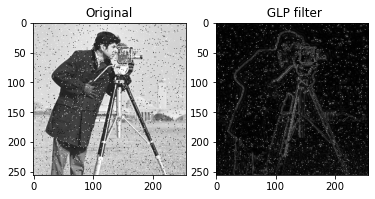

In [77]:
image = im2
filtered_image = apply_ideal_hpf(image, 30)
fig, axs = plt.subplots(1, 2)
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(filtered_image, cmap='gray')
axs[1].set_title(' GLP filter')
plt.show()

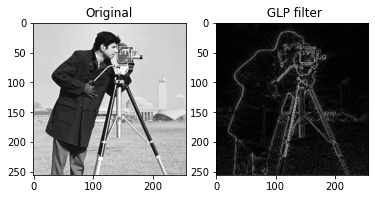

In [78]:
image = im3
filtered_image = apply_ideal_hpf(image, 30)
fig, axs = plt.subplots(1, 2)
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(filtered_image, cmap='gray')
axs[1].set_title(' GLP filter')
plt.show()

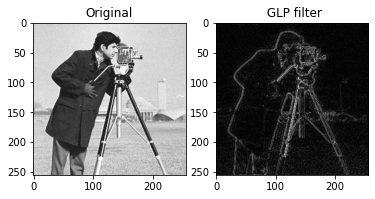

In [79]:
image = im4
filtered_image = apply_ideal_hpf(image, 30)
fig, axs = plt.subplots(1, 2)
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(filtered_image, cmap='gray')
axs[1].set_title(' GLP filter')
plt.show()